# intro
excuse my java naming conventions 

In [1]:
import pandas as pd
from pandas import IndexSlice as idx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
pd.set_option('display.max_rows', 400)
pd.options.display.float_format = '{:.3f}'.format
sns.set_theme(context='talk', style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Importing Data

### Population Estimates
Bin data and create dataframes for Ontario, weights for each age group in years 2020 & 2021
merge huron & perth

In [2]:
#Population Estimates
POP_ESTIMATES = pd.read_csv('PHU Pop by Age and Sex.csv')
POP_ESTIMATES = POP_ESTIMATES.loc[POP_ESTIMATES['Population CYear'].isin([2020, 2021])]
POP_ESTIMATES.drop(['Age Grp (Inf,5yr)'],1,inplace=True)
POP_ESTIMATES['AGE_GRP'] = pd.cut(POP_ESTIMATES.Age, 
                            bins=[0,20,30,40,50,60,70,80,90,100],
                            labels=['0-19','20s','30s','40s','50s','60s','70s','80s','90+'],
                            right=False)
POP_ESTIMATES.rename(columns={'Sex Type Code':'GENDER', 
                              '# People':'POP',
                              'PHU Code':'CODE',
                              'Population CYear':'YEAR', 
                              'Age':'AGE'}, inplace=True)
POP_ESTIMATES.reset_index(inplace=True, drop=True)
POP_ESTIMATES.loc[POP_ESTIMATES.GENDER == 'M', 'GENDER']='MALE'
POP_ESTIMATES.loc[POP_ESTIMATES.GENDER == 'F', 'GENDER']='FEMALE'


hp = []
years = [2020, 2021]
for year in years:
    Huron, Perth = (POP_ESTIMATES.loc[(POP_ESTIMATES.YEAR == year) & (POP_ESTIMATES['CODE']==2239)],
                    POP_ESTIMATES.loc[(POP_ESTIMATES.YEAR == year) & (POP_ESTIMATES['CODE']==2254)])
    rows = Huron.shape[0]
    PHUs=[Huron, Perth]
    for i in range (len(PHUs)):
        df=PHUs[i]
        df=df.sort_values('AGE')
        df.index=pd.Series(np.arange(0,rows,1))
        PHUs[i]=df
     
    HuronPerth = pd.DataFrame(columns = ['YEAR','CODE','PHU','AGE','GENDER','POP','AGE_GRP'])
    HuronPerth.YEAR = [year]*rows
    HuronPerth.CODE = [5183]*rows
    HuronPerth.PHU = ['HURON PERTH HEALTH UNIT']*rows
    HuronPerth.AGE = PHUs[0].AGE
    HuronPerth.GENDER = PHUs[0].GENDER
    HuronPerth.POP = (PHUs[0].POP + PHUs[1].POP)
    HuronPerth.AGE_GRP = PHUs[0].AGE_GRP
    hp.append(HuronPerth)
    
HuronPerthPHU = hp[0].append(hp[1], ignore_index=True)
POP_ESTIMATES = POP_ESTIMATES.loc[(POP_ESTIMATES.CODE!=2239) & (POP_ESTIMATES.CODE!=2254)]
POP_ESTIMATES = POP_ESTIMATES.append(HuronPerthPHU, ignore_index=True)







In [3]:
Pop_AgeSexPHU = POP_ESTIMATES.groupby(by=['YEAR','CODE','PHU', 'AGE_GRP', 'GENDER'], observed=True)['POP'].agg('sum').reset_index().set_index('CODE')

Pop_AgeSexPHU_2020 = Pop_AgeSexPHU.loc[Pop_AgeSexPHU.YEAR==2020].drop(['YEAR'],1)
Pop_AgePHU_2020 = Pop_AgeSexPHU_2020.groupby(by=['CODE', 'PHU', 'AGE_GRP'], observed=True)['POP'].agg('sum').reset_index().set_index('CODE')
Pop_SexPHU_2020 = Pop_AgeSexPHU_2020.groupby(by=['CODE', 'PHU', 'GENDER'], observed=True)['POP'].agg('sum').reset_index().set_index('CODE')
Pop_PHU_2020 = Pop_AgePHU_2020.groupby(by=['CODE', 'PHU'], observed=True)['POP'].agg('sum').reset_index().set_index('CODE')
display(Pop_AgeSexPHU_2020.head(5), Pop_AgePHU_2020.head(5), Pop_SexPHU_2020.head(5), Pop_PHU_2020.head(5))

Pop_AgeSexPHU_2021 = Pop_AgeSexPHU.loc[Pop_AgeSexPHU.YEAR==2021].drop(['YEAR'],1)
Pop_AgePHU_2021 = Pop_AgeSexPHU_2021.groupby(by=['CODE','PHU','AGE_GRP'],observed=True)['POP'].agg('sum').reset_index().set_index('CODE')
Pop_SexPHU_2021 = Pop_AgeSexPHU_2021.groupby(by=['CODE', 'PHU', 'GENDER'], observed=True)['POP'].agg('sum').reset_index().set_index('CODE')
Pop_PHU_2021 = Pop_AgePHU_2020.groupby(by=['CODE','PHU'], observed=True)['POP'].agg('sum').reset_index().set_index('CODE')
display(Pop_AgeSexPHU_2021.head(5), Pop_AgePHU_2021.head(5), Pop_SexPHU_2021.head(5), Pop_PHU_2020.head(5))


Pop_AgeSexON_2020 = Pop_AgeSexPHU_2020.groupby(by=['AGE_GRP','GENDER'],observed=True)['POP'].agg('sum').reset_index()
Pop_AgeON_2020 = Pop_AgePHU_2020.groupby(by=['AGE_GRP'],observed=True)['POP'].agg('sum').reset_index()
Pop_SexON_2020 = Pop_SexPHU_2020.groupby(by=['GENDER'],observed=True)['POP'].agg('sum').reset_index()
Pop_ON_2020 = Pop_SexON_2020['POP'].sum()
display(Pop_AgeSexON_2020.head(5), Pop_AgeON_2020.head(5), Pop_SexON_2020.head(5))
print(Pop_ON_2020)

Pop_AgeSexON_2021 = Pop_AgeSexPHU_2021.groupby(by=['AGE_GRP','GENDER'],observed=True)['POP'].agg('sum').reset_index()
Pop_AgeON_2021 = Pop_AgePHU_2021.groupby(by=['AGE_GRP'],observed=True)['POP'].agg('sum').reset_index()
Pop_SexON_2021 = Pop_SexPHU_2021.groupby(by=['GENDER'],observed=True)['POP'].agg('sum').reset_index()
Pop_ON_2021 = Pop_SexON_2021['POP'].sum()
display(Pop_AgeSexON_2021.head(5), Pop_AgeON_2021.head(5), Pop_SexON_2021.head(5))
print(Pop_ON_2021)



,PHU,AGE_GRP,GENDER,POP
CODE,,,,
2226,ALGOMA PUBLIC HEALTH,0-19,FEMALE,10803
2226,ALGOMA PUBLIC HEALTH,0-19,MALE,11061
2226,ALGOMA PUBLIC HEALTH,20s,FEMALE,6266
2226,ALGOMA PUBLIC HEALTH,20s,MALE,6903
2226,ALGOMA PUBLIC HEALTH,30s,FEMALE,6188


,PHU,AGE_GRP,POP
CODE,,,
2226,ALGOMA PUBLIC HEALTH,0-19,21864
2226,ALGOMA PUBLIC HEALTH,20s,13169
2226,ALGOMA PUBLIC HEALTH,30s,12062
2226,ALGOMA PUBLIC HEALTH,40s,11663
2226,ALGOMA PUBLIC HEALTH,50s,16446


,PHU,GENDER,POP
CODE,,,
2226,ALGOMA PUBLIC HEALTH,FEMALE,58448
2226,ALGOMA PUBLIC HEALTH,MALE,55986
2227,BRANT COUNTY HEALTH UNIT,FEMALE,78730
2227,BRANT COUNTY HEALTH UNIT,MALE,76473
2230,DURHAM REGION HEALTH DEPARTMENT,FEMALE,362186


,PHU,POP
CODE,,
2226,ALGOMA PUBLIC HEALTH,114434
2227,BRANT COUNTY HEALTH UNIT,155203
2230,DURHAM REGION HEALTH DEPARTMENT,712402
2233,GREY BRUCE HEALTH UNIT,169884
2234,HALDIMAND-NORFOLK HEALTH UNIT,114081


,PHU,AGE_GRP,GENDER,POP
CODE,,,,
2226,ALGOMA PUBLIC HEALTH,0-19,FEMALE,10792
2226,ALGOMA PUBLIC HEALTH,0-19,MALE,11041
2226,ALGOMA PUBLIC HEALTH,20s,FEMALE,6102
2226,ALGOMA PUBLIC HEALTH,20s,MALE,6745
2226,ALGOMA PUBLIC HEALTH,30s,FEMALE,6220


,PHU,AGE_GRP,POP
CODE,,,
2226,ALGOMA PUBLIC HEALTH,0-19,21833
2226,ALGOMA PUBLIC HEALTH,20s,12847
2226,ALGOMA PUBLIC HEALTH,30s,12189
2226,ALGOMA PUBLIC HEALTH,40s,11457
2226,ALGOMA PUBLIC HEALTH,50s,15751


,PHU,GENDER,POP
CODE,,,
2226,ALGOMA PUBLIC HEALTH,FEMALE,58318
2226,ALGOMA PUBLIC HEALTH,MALE,55799
2227,BRANT COUNTY HEALTH UNIT,FEMALE,79556
2227,BRANT COUNTY HEALTH UNIT,MALE,77347
2230,DURHAM REGION HEALTH DEPARTMENT,FEMALE,367155


,PHU,POP
CODE,,
2226,ALGOMA PUBLIC HEALTH,114434
2227,BRANT COUNTY HEALTH UNIT,155203
2230,DURHAM REGION HEALTH DEPARTMENT,712402
2233,GREY BRUCE HEALTH UNIT,169884
2234,HALDIMAND-NORFOLK HEALTH UNIT,114081


,AGE_GRP,GENDER,POP
0,0-19,FEMALE,1526473
1,0-19,MALE,1609991
2,20s,FEMALE,1025380
3,20s,MALE,1074795
4,30s,FEMALE,1047149


,AGE_GRP,POP
0,0-19,3136464
1,20s,2100175
2,30s,2056056
3,40s,1876585
4,50s,2060937


,GENDER,POP
0,FEMALE,7544866
1,MALE,7319562


14864428


,AGE_GRP,GENDER,POP
0,0-19,FEMALE,1541623
1,0-19,MALE,1625439
2,20s,FEMALE,1018908
3,20s,MALE,1071829
4,30s,FEMALE,1070053


,AGE_GRP,POP
0,0-19,3167062
1,20s,2090737
2,30s,2102409
3,40s,1887201
4,50s,2041168


,GENDER,POP
0,FEMALE,7640541
1,MALE,7413449


15053990


### Social Determinants of Health
merge perth & huron

In [4]:
#Social Determinants
PHU_SOCIAL = pd.read_excel('Social_Determinants_by_PHU.xls')
PHU_SOCIAL.drop(['Is_PHU', 'Year'],1,inplace=True)
PHU_SOCIAL.rename(columns={'PHU_Code':'CODE',
                           'Value':'PERCENT'},inplace=True)


hp = PHU_SOCIAL.loc[(PHU_SOCIAL.CODE == 2239) | (PHU_SOCIAL.CODE==2254)].reset_index(drop=True)

#display(hp.head(10))
indicator_rate = []
for i in PHU_SOCIAL['ind'].unique():
    Indicator, ind_n = hp.loc[hp.ind==i,'Indicator'].unique()[0], hp.loc[hp.ind==i,'ind_n'].unique()[0]
    num,denom = hp.loc[(hp.ind == i, 'Numerator_Count')].sum(), hp.loc[(hp.ind == i, 'Denominator_Count')].sum()
    percent = num/denom * 100
    indicator_rate.append([Indicator, i, ind_n, 'Huron Perth Health Unit', percent, num, denom, 5183])
    
    
PHU_SOCIAL = PHU_SOCIAL.loc[(PHU_SOCIAL.CODE != 2239) & (PHU_SOCIAL.CODE!=2254)].reset_index(drop=True)
#display(PHU_SOCIAL)
PHU_SOCIAL = PHU_SOCIAL.append(pd.DataFrame(indicator_rate, columns=['Indicator', 'ind', 'ind_n', 
                                                                     'PHU', 'PERCENT', 'Numerator_Count', 
                                                                     'Denominator_Count', 'CODE' ]))
display(PHU_SOCIAL)

social_subset = PHU_SOCIAL.pivot(index=['CODE', 'PHU'], values='PERCENT', columns='ind').reset_index()
a = social_subset
social_subset = social_subset.loc[:,['CODE','PHU','no_hs','LICO_all','recent_immigrant','visible_min']]

social_subset.rename(columns = {'PHU_Code': 'PHU_N', 'no_hs': '% No High School Education',
                               'LICO_all': '% Low Income Households', 'recent_immigrant': '% Recent Immigrant',
                               'visible_min' : '% Visible Minority'}, inplace=True)
social_subset

,Indicator,ind,ind_n,PHU,PERCENT,Numerator_Count,Denominator_Count,CODE
0,Per cent (%) immigrant population,immigrant,ind_1,Algoma Public Health,8.000,8885,111085,2226
1,Per cent (%) immigrant population,immigrant,ind_1,Brant County Health Unit,12.400,16470,132375,2227
2,Per cent (%) immigrant population,immigrant,ind_1,Chatham-Kent Public Health,8.600,8630,99775,2240
3,Per cent (%) immigrant population,immigrant,ind_1,City of Hamilton Public Health Services,24.700,130365,527930,2237
4,Per cent (%) immigrant population,immigrant,ind_1,Durham Region Health Department,23.600,150885,639495,2230
...,...,...,...,...,...,...,...,...
16,Per cent (%) of the population with a post-sec...,ps,ind_17,Huron Perth Health Unit,53.723,36215,67410,5183
17,Per cent (%) of the population without a high ...,no_hs,ind_18,Huron Perth Health Unit,16.051,10820,67410,5183
18,Per cent (%) recent immigrant population,recent_immigrant,ind_19,Huron Perth Health Unit,0.594,790,133005,5183
19,Per cent (%) senior population,seniors,ind_20,Huron Perth Health Unit,20.408,27775,136100,5183


ind,CODE,PHU,% No High School Education,% Low Income Households,% Recent Immigrant,% Visible Minority
0,2226,Algoma Public Health,12.000,7.300,0.400,2.300
1,2227,Brant County Health Unit,13.100,6.200,0.800,7.700
2,2230,Durham Region Health Department,8.900,6.000,1.600,27.100
3,2233,Grey Bruce Health Unit,14.100,4.900,0.400,2.300
4,2234,Haldimand-Norfolk Health Unit,14.600,3.800,0.400,2.100
5,2235,"Haliburton, Kawartha, Pine Ridge District Heal...",12.200,4.500,0.300,2.700
6,2236,Halton Region Public Health,5.200,5.900,3.800,25.700
7,2237,City of Hamilton Public Health Services,12.200,12.300,2.500,19.000
8,2238,Hastings Prince Edward Public Health,13.700,6.300,0.500,3.400
9,2240,Chatham-Kent Public Health,16.100,6.800,0.700,4.500


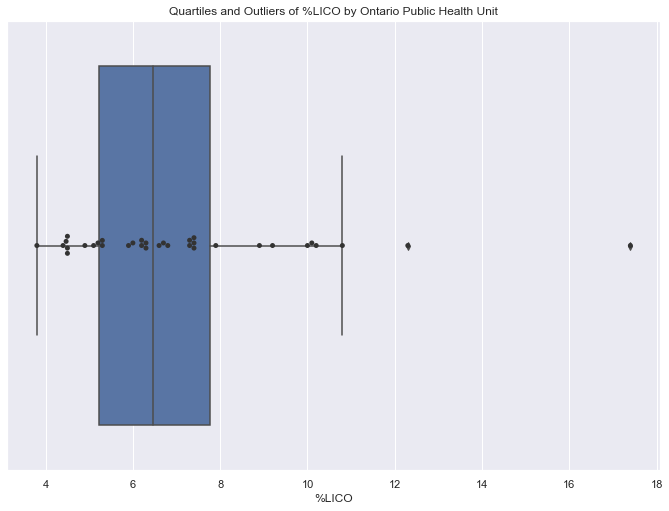

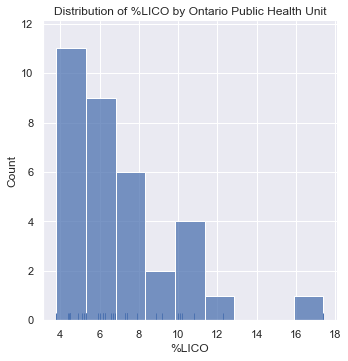

In [5]:
ax = sns.boxplot(data=a, x='LICO_all')
ax.set(title='Quartiles and Outliers of %LICO by Ontario Public Health Unit')
sns.swarmplot(data=a, x='LICO_all', dodge=True, color='0.2')
plt.xlabel('%LICO')

plt.show()

ax = sns.displot(data=a, x='LICO_all', rug=True)
ax.set(title='Distribution of %LICO by Ontario Public Health Unit')
plt.xlabel('%LICO')
plt.show()

### Confirmed Covid Cases
Clean up dataset to remove unneeded data

In [6]:
#Covid Data
CONFIRMED_COVID = pd.read_csv('Confirmed Covid Cases In Ontario.csv')
CONFIRMED_COVID.drop(CONFIRMED_COVID.columns.difference(
                                    ['Case_Reported_Date', 'Age_Group', 'Client_Gender', 'Outcome1', 
                                     'Reporting_PHU_ID', 'Reporting_PHU']), 1, inplace=True)

CONFIRMED_COVID.loc[CONFIRMED_COVID.Age_Group == '<20', 'Age_Group'] = '0-19'
CONFIRMED_COVID.loc[CONFIRMED_COVID.Outcome1 == 'Not Resolved', 'Outcome1'] = 'Not_Resolved'
CONFIRMED_COVID.rename(columns={'Client_Gender':'GENDER', 
                                'Age_Group':'AGE_GRP',
                                'Case_Reported_Date':'DATE_REPORTED',
                                'Outcome1':'OUTCOME',
                                'Reporting_PHU_ID':'CODE',
                                'Reporting_PHU':'PHU'},inplace=True)
CONFIRMED_COVID.DATE_REPORTED = pd.to_datetime(CONFIRMED_COVID.DATE_REPORTED).dt.date

In [7]:
CONFIRMED_COVID.groupby(['GENDER', 'AGE_GRP'], observed=True).size().reset_index()

,GENDER,AGE_GRP,0
0,FEMALE,0-19,41112
1,FEMALE,20s,52960
2,FEMALE,30s,42659
3,FEMALE,40s,39883
4,FEMALE,50s,38597
5,FEMALE,60s,22737
6,FEMALE,70s,11894
7,FEMALE,80s,9734
8,FEMALE,90+,6143
9,FEMALE,UNKNOWN,34


In [8]:
CONFIRMED_COVID = CONFIRMED_COVID[(CONFIRMED_COVID.GENDER!='UNSPECIFIED') 
                                  & (CONFIRMED_COVID.GENDER!='GENDER DIVERSE') 
                                  & (CONFIRMED_COVID.AGE_GRP!='UNKNOWN')]
CONFIRMED_COVID.groupby(['GENDER', 'AGE_GRP']).size().reset_index()

,GENDER,AGE_GRP,0
0,FEMALE,0-19,41112
1,FEMALE,20s,52960
2,FEMALE,30s,42659
3,FEMALE,40s,39883
4,FEMALE,50s,38597
5,FEMALE,60s,22737
6,FEMALE,70s,11894
7,FEMALE,80s,9734
8,FEMALE,90+,6143
9,MALE,0-19,44013


In [9]:
RateByPHU = CONFIRMED_COVID.groupby(['CODE','PHU']).size().reset_index().set_index('CODE')
RateByPHU.rename(columns={0:'Total_Cases'},inplace=True)
RateByPHU['POP'] = Pop_PHU_2021['POP']
RateByPHU['CrudeRate'] = (RateByPHU['Total_Cases'] / RateByPHU['POP'])*1000
RateByPHU.sort_values(by='CrudeRate', inplace=True)
RateByPHU

,PHU,Total_Cases,POP,CrudeRate
CODE,,,,
2226,Algoma Public Health Unit,390,114434,3.408
2247,North Bay Parry Sound District Health Unit,456,129752,3.514
2263,Timiskaming Health Unit,203,32689,6.210
2257,Renfrew County and District Health Unit,678,108631,6.241
2238,Hastings and Prince Edward Counties Health Unit,1102,168493,6.540
2241,"Kingston, Frontenac and Lennox & Addington Pub...",1528,212719,7.183
2233,Grey Bruce Health Unit,1314,169884,7.735
2243,"Leeds, Grenville and Lanark District Health Unit",1724,173170,9.956
2255,Peterborough Public Health,1524,147977,10.299


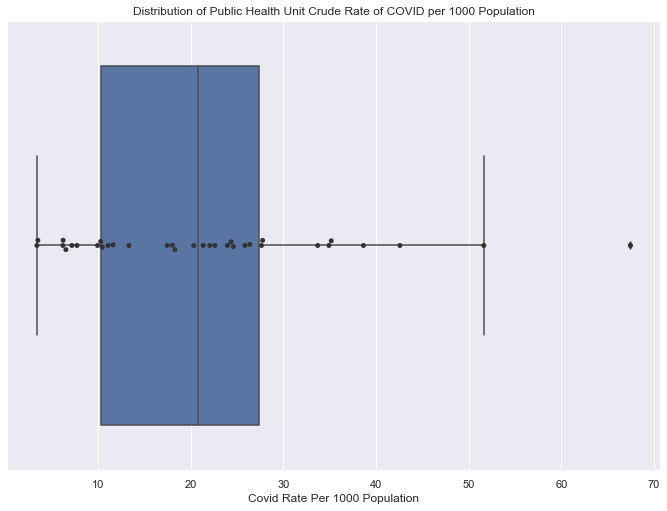

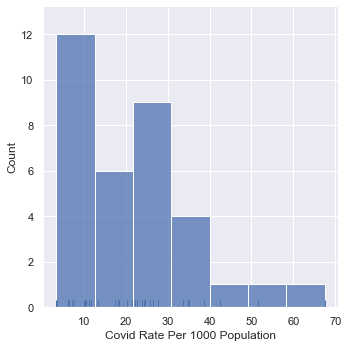

In [10]:
ax = sns.boxplot(data=RateByPHU, x = 'CrudeRate', hue_order='Special')
ax.set(title='Distribution of Public Health Unit Crude Rate of COVID per 1000 Population')
sns.swarmplot(data=RateByPHU, x = 'CrudeRate', dodge=True, color='0.2')
plt.xlabel('Covid Rate Per 1000 Population')

plt.show()
ax = sns.displot(data=RateByPHU, x = 'CrudeRate', rug=True)
plt.xlabel('Covid Rate Per 1000 Population')
plt.show()



<AxesSubplot:xlabel='AGE_GRP', ylabel='CrudeRate'>

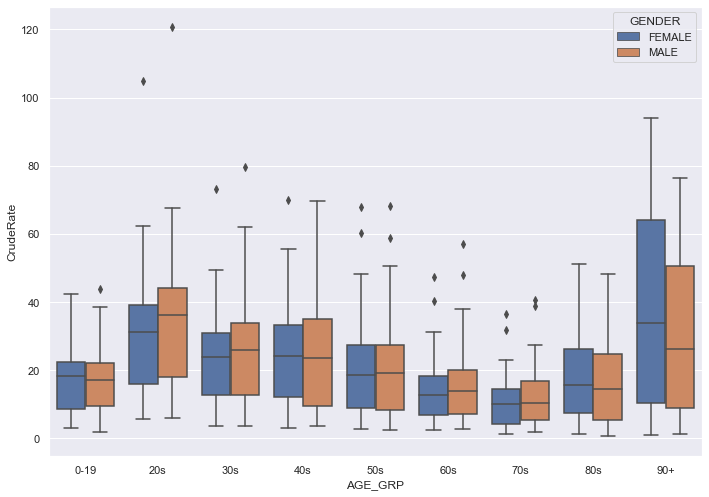

In [11]:
PHURateByAgeSex = CONFIRMED_COVID.groupby(['PHU','CODE', 'AGE_GRP', 'GENDER']).size().to_frame().reset_index().rename(columns={0:'Total_Cases'})
PHURateByAgeSex = PHURateByAgeSex.merge(Pop_AgeSexPHU_2021,on=['CODE', 'AGE_GRP', 'GENDER'],suffixes=('_Covid','_Pop'))
PHURateByAgeSex.drop(columns=['PHU_Covid'], inplace=True)
PHURateByAgeSex['CrudeRate'] = (PHURateByAgeSex['Total_Cases'] / PHURateByAgeSex['POP']) * 1000
sns.boxplot(data=PHURateByAgeSex, x='AGE_GRP', y='CrudeRate', hue='GENDER')

In [12]:
#Update the original dataset to not contain these entries
CONFIRMED_COVID = CONFIRMED_COVID.loc[(CONFIRMED_COVID.AGE_GRP!='UNKNOWN')]
AgeSex_Outcomes = pd.crosstab([CONFIRMED_COVID.AGE_GRP, CONFIRMED_COVID.GENDER], CONFIRMED_COVID.OUTCOME)
AgeSex_Outcomes['Total'] = AgeSex_Outcomes.Fatal+AgeSex_Outcomes.Resolved+AgeSex_Outcomes.Not_Resolved

#For outcome rate calc because Total is masked
AgeSex_Outcomes['Known'] = AgeSex_Outcomes.Fatal+AgeSex_Outcomes.Resolved
AgeSex_Outcomes['Mortality_Rate']= (AgeSex_Outcomes.Fatal / AgeSex_Outcomes.Known) * 1000

<AxesSubplot:xlabel='AGE_GRP', ylabel='Deaths per 1000 Cases'>

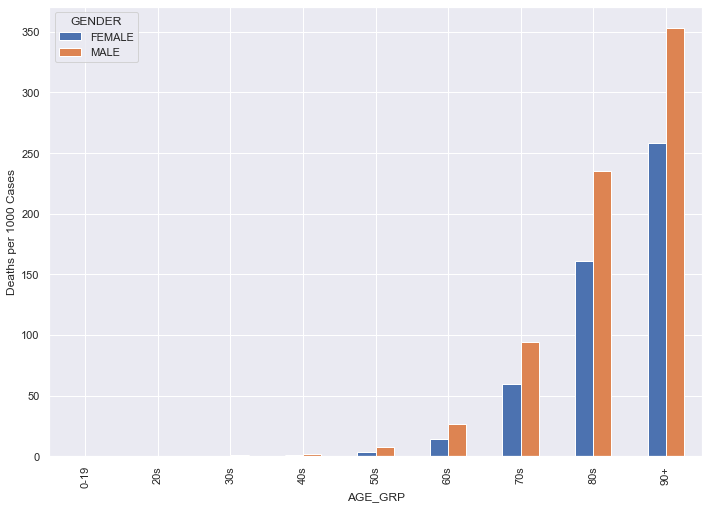

In [13]:
AgeSex_Outcomes.unstack().plot(kind='bar', y='Mortality_Rate', ylabel='Deaths per 1000 Cases')


##  Determine COVID YEAR on provincial and regional level

In [14]:
# Ontario 
OntarioCasesPerDay = CONFIRMED_COVID.groupby(['DATE_REPORTED']).size().reset_index()
OntarioCasesPerDay.rename(columns = {0: 'CASES'},inplace=True)
OntarioCovidYearStart = OntarioCasesPerDay.iloc[0,0]
OntarioCovidYearEnd = OntarioCovidYearStart + timedelta(365) 

OntarioCovidYearCases = CONFIRMED_COVID[CONFIRMED_COVID.DATE_REPORTED <= OntarioCovidYearEnd]
#OntarioCovidYearCases

In [15]:
OntarioCovidYearCasesByAge = OntarioCovidYearCases.groupby(['AGE_GRP']).size().to_frame()
OntarioCovidYearCasesByAge.rename(columns={0:'Number Of Cases'}, inplace=True)
PopWt2021 = (OntarioCovidYearEnd - date(2021,1,1)).days/365
PopWt2020 = 1-PopWt2021

OntarioCovidYearPopulation = POP_ESTIMATES[(POP_ESTIMATES.YEAR==2020)|(POP_ESTIMATES.YEAR==2021)].groupby(
    ['AGE_GRP','YEAR'])['POP'].sum().reset_index().pivot(index='AGE_GRP',columns='YEAR',values='POP')
OntarioCovidYearPopulation['AdjustedPop'] = (PopWt2021*OntarioCovidYearPopulation[2021])+(PopWt2020*OntarioCovidYearPopulation[2020])
OntarioCovidYearPopulation

YEAR,2020,2021,AdjustedPop
AGE_GRP,,,
0-19,3136464,3167062,3138224.433
20s,2100175,2090737,2099631.992
30s,2056056,2102409,2058722.885
40s,1876585,1887201,1877195.784
50s,2060937,2041168,2059799.605
60s,1795047,1852041,1798326.107
70s,1159898,1211117,1162844.847
80s,539715,555605,540629.219
90+,139551,146650,139959.436


In [16]:

PHUCasesPerDay = CONFIRMED_COVID.groupby(['DATE_REPORTED','CODE']).size().unstack()

PHUYears = []
for code in PHUCasesPerDay.columns.to_list():
    col = PHUCasesPerDay.loc[:,code]
    yStart, yEnd = col.first_valid_index(), col.first_valid_index()+timedelta(365)
    phu = [code, yStart, yEnd]
    PHUYears.append(phu)
PHUYears = pd.DataFrame(PHUYears, columns=["CODE", "CovidYearStart", "CovidYearEnd"])
#display(PHUYears)

PHUCovidYearCases = PHUYears.merge(CONFIRMED_COVID, on='CODE')
PHUCovidYearCases = PHUCovidYearCases[((PHUCovidYearCases.DATE_REPORTED>=PHUCovidYearCases.CovidYearStart)
                                           &(PHUCovidYearCases.DATE_REPORTED<=PHUCovidYearCases.CovidYearEnd))]

In [17]:
PHUCovidYearCasesByAge = PHUCovidYearCases.groupby(['CODE', 'AGE_GRP']).size().to_frame()
PHUCovidYearCasesByAge.rename(columns={0:'Cases'}, inplace=True)
PHUCovidYearCasesByAge.reset_index(inplace=True)

PHUCovidYearPopulationByAge = POP_ESTIMATES[(POP_ESTIMATES.YEAR==2021) | (POP_ESTIMATES.YEAR==2020)].groupby(
    ['CODE', 'AGE_GRP', 'YEAR'])['POP'].sum().reset_index().pivot(index=['CODE','AGE_GRP'], columns='YEAR', 
                                                                  values='POP').reset_index().merge(PHUYears)

PHUCovidYearPopulationByAge['PopWt2021'] = (pd.to_datetime(PHUCovidYearPopulationByAge.CovidYearEnd) - datetime(2021,1,1)).dt.days/365
PHUCovidYearPopulationByAge['PopWt2020'] = 1-PHUCovidYearPopulationByAge['PopWt2021']
PHUCovidYearPopulationByAge['InterpolatedPop'] = (PHUCovidYearPopulationByAge[2020] * PHUCovidYearPopulationByAge.PopWt2020) + (PHUCovidYearPopulationByAge[2021] * PHUCovidYearPopulationByAge.PopWt2021)
display(PHUCovidYearPopulationByAge.head())

PHUCovidYearCasesByAge=PHUCovidYearCasesByAge.merge(PHUCovidYearPopulationByAge)
PHUCovidYearCasesByAge['Rate'] = (PHUCovidYearCasesByAge.Cases / PHUCovidYearCasesByAge.InterpolatedPop)*1000
PHUCovidYearCasesByAge.head()


,CODE,AGE_GRP,2020,2021,CovidYearStart,CovidYearEnd,PopWt2021,PopWt2020,InterpolatedPop
0,2226,0-19,21864,21833,2020-03-16,2021-03-16,0.203,0.797,21857.715
1,2226,20s,13169,12847,2020-03-16,2021-03-16,0.203,0.797,13103.718
2,2226,30s,12062,12189,2020-03-16,2021-03-16,0.203,0.797,12087.748
3,2226,40s,11663,11457,2020-03-16,2021-03-16,0.203,0.797,11621.236
4,2226,50s,16446,15751,2020-03-16,2021-03-16,0.203,0.797,16305.096


,CODE,AGE_GRP,Cases,2020,2021,CovidYearStart,CovidYearEnd,PopWt2021,PopWt2020,InterpolatedPop,Rate
0,2226,0-19,19,21864,21833,2020-03-16,2021-03-16,0.203,0.797,21857.715,0.869
1,2226,20s,51,13169,12847,2020-03-16,2021-03-16,0.203,0.797,13103.718,3.892
2,2226,30s,36,12062,12189,2020-03-16,2021-03-16,0.203,0.797,12087.748,2.978
3,2226,40s,35,11663,11457,2020-03-16,2021-03-16,0.203,0.797,11621.236,3.012
4,2226,50s,26,16446,15751,2020-03-16,2021-03-16,0.203,0.797,16305.096,1.595


Gender diverse and unspecified are small so drop them from dataset. Same with Unknown age;

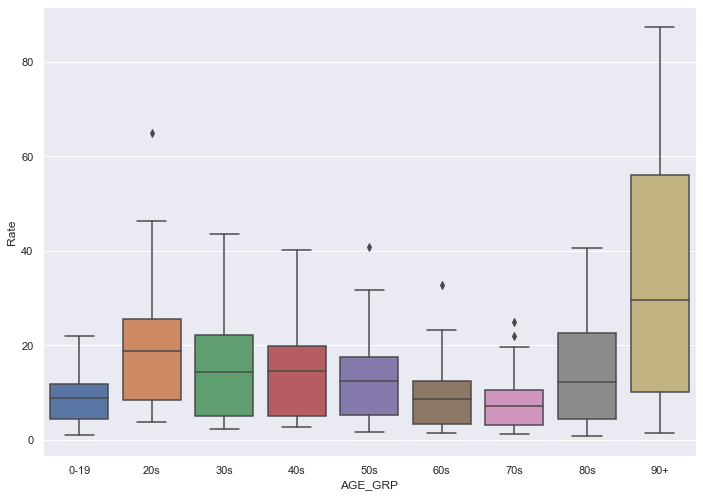

In [18]:
sns.boxplot(data=PHUCovidYearCasesByAge, x='AGE_GRP', y='Rate')
plt.show()

,CODE,Cases,InterpolatedPop,StandardizedRate,CrudeRate,PHU,% No High School Education,% Low Income Households,% Recent Immigrant,% Visible Minority
0,2226,217,114369.732,2.053,1.897,Algoma Public Health,12.000,7.300,0.400,2.300
1,2227,1981,155538.342,12.902,12.736,Brant County Health Unit,13.100,6.200,0.800,7.700
2,2230,11814,713931.942,16.786,16.548,Durham Region Health Department,8.900,6.000,1.600,27.100
3,2233,709,170066.000,4.417,4.169,Grey Bruce Health Unit,14.100,4.900,0.400,2.300
4,2234,1559,114165.460,14.598,13.656,Haldimand-Norfolk Health Unit,14.600,3.800,0.400,2.100


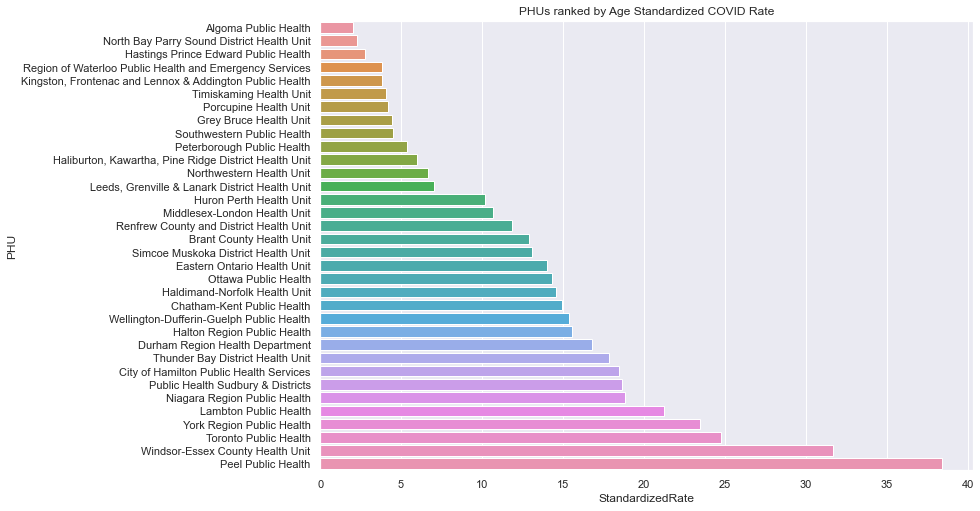

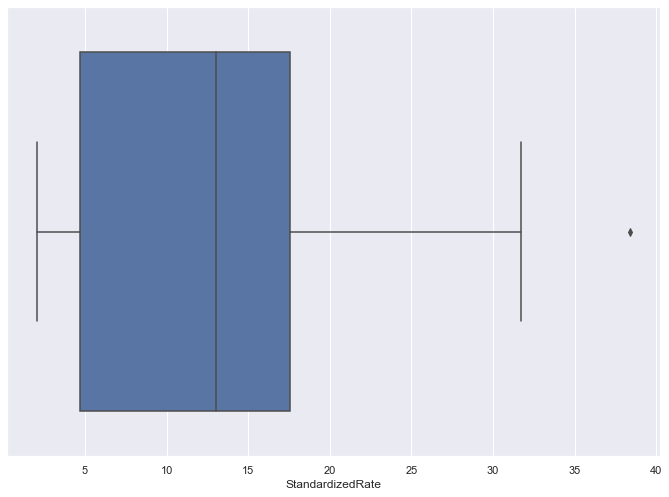

In [19]:
ONPopAgeWeights2021 = Pop_AgeON_2021
ONPopAgeWeights2021['AgeGrpWeights'] = ONPopAgeWeights2021['POP'] / Pop_ON_2021
#display(ONPopAgeWeights2021)
PHUCasesByAgeWeighted = PHUCovidYearCasesByAge.merge(ONPopAgeWeights2021)
#display(PHUCasesByAgeWeighted.head(5))
PHUCasesByAgeWeighted['StandardizedRate'] = PHUCasesByAgeWeighted['Rate'] * PHUCasesByAgeWeighted['AgeGrpWeights']
StandardizedRatePHU=PHUCasesByAgeWeighted.groupby('CODE')['StandardizedRate'].sum().reset_index()
TotalCasesPHU = PHUCovidYearCasesByAge.groupby('CODE')['Cases'].sum().reset_index()
TotalPopPHU = PHUCovidYearPopulationByAge.groupby('CODE')['InterpolatedPop'].sum().reset_index()

CovidRatesPHU = TotalCasesPHU.merge(TotalPopPHU).merge(StandardizedRatePHU)
CovidRatesPHU['CrudeRate'] = (CovidRatesPHU.Cases / CovidRatesPHU.InterpolatedPop)*1000
save=CovidRatesPHU
CovidRatesPHU=CovidRatesPHU.merge(social_subset)
display(CovidRatesPHU.head(5))

ax = sns.barplot(data=CovidRatesPHU.sort_values('StandardizedRate'), x='StandardizedRate', y='PHU')
ax.set(title='PHUs ranked by Age Standardized COVID Rate')
plt.show()
sns.boxplot(data=CovidRatesPHU, x='StandardizedRate')
plt.show()

,CODE,Cases,InterpolatedPop,StandardizedRate,CrudeRate,PHU,% No High School Education,% Low Income Households,% Recent Immigrant,% Visible Minority,Special
0,2226,217,114369.732,2.053,1.897,Algoma Public Health,12.000,7.300,0.400,2.300,Algoma
1,2227,1981,155538.342,12.902,12.736,Brant County Health Unit,13.100,6.200,0.800,7.700,Other
2,2230,11814,713931.942,16.786,16.548,Durham Region Health Department,8.900,6.000,1.600,27.100,Other
3,2233,709,170066.000,4.417,4.169,Grey Bruce Health Unit,14.100,4.900,0.400,2.300,Other
4,2234,1559,114165.460,14.598,13.656,Haldimand-Norfolk Health Unit,14.600,3.800,0.400,2.100,Other
5,2235,1081,189232.088,5.990,5.713,"Haliburton, Kawartha, Pine Ridge District Heal...",12.200,4.500,0.300,2.700,Other
6,2236,9532,621315.088,15.572,15.342,Halton Region Public Health,5.200,5.900,3.800,25.700,Other
7,2237,11021,593505.301,18.450,18.569,City of Hamilton Public Health Services,12.200,12.300,2.500,19.000,Other
8,2238,438,168605.230,2.789,2.598,Hastings Prince Edward Public Health,13.700,6.300,0.500,3.400,Hastings Prince Edward
9,2240,1488,106318.849,14.940,13.996,Chatham-Kent Public Health,16.100,6.800,0.700,4.500,Other


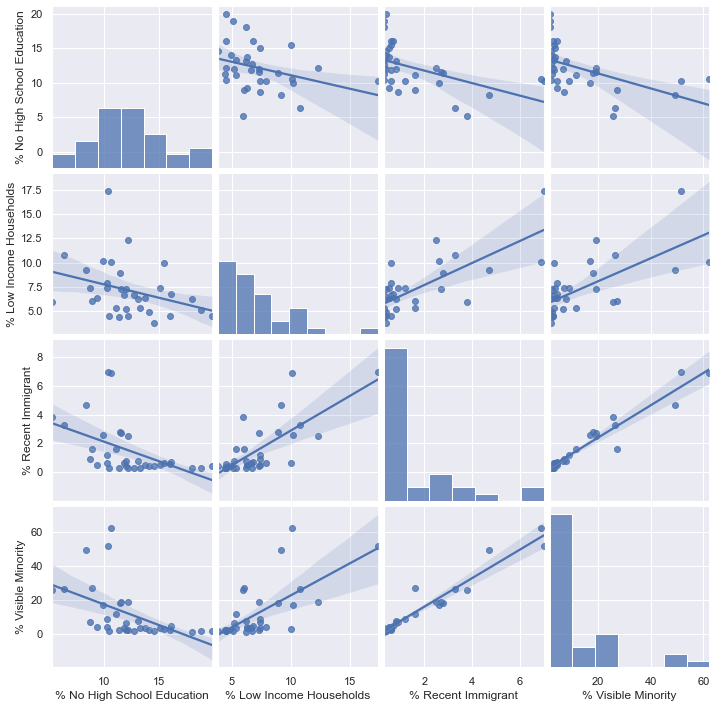

In [20]:

# correlations = CovidRatesPHU[CovidRatesPHU.columns.difference(['CODE', 'Cases','CrudeRate'])].corr()
# display(correlations)
# ax = sns.heatmap(correlations)
# plt.show()

# ax = sns.pairplot(data=CovidRatesPHU.loc[:,['StandardizedRate','% No High School Education',
#                            '% Low Income Households', 
#                            '% Recent Immigrant',
#                            '% Visible Minority']], y_vars="StandardizedRate",kind='reg')
# plt.show()

CovidRatesPHU['Special'] = np.where(CovidRatesPHU['PHU']=='Peel Public Health', 'Peel', 
                                  np.where(CovidRatesPHU['PHU']=='Windsor-Essex County Health Unit', 'Windsor-Essex', 
                                          np.where(CovidRatesPHU['PHU']=='Toronto Public Health', 'Toronto', 
                                                   np.where(CovidRatesPHU['PHU']=='Algoma Public Health', 'Algoma', 
                                                           np.where(CovidRatesPHU['PHU']=='North Bay Perry Sound District Health Unit', 'North Bay Perry Sound', 
                                                                   np.where(CovidRatesPHU['PHU']=='Hastings Prince Edward Public Health', 'Hastings Prince Edward', 'Other'))))))

display(CovidRatesPHU.head(50))
ax = sns.pairplot(data=CovidRatesPHU.loc[:,['% No High School Education',
                           '% Low Income Households', 
                           '% Recent Immigrant',
                           '% Visible Minority']],
                             y_vars=['% No High School Education',
                           '% Low Income Households', 
                           '% Recent Immigrant',
                           '% Visible Minority'],
                             x_vars=['% No High School Education',
                           '% Low Income Households', 
                           '% Recent Immigrant',
                           '% Visible Minority'],
                             kind='reg')

plt.show()

# Case Rate Regressions

In [21]:
import statsmodels as sm
import statsmodels.formula.api as smf
RatesConcatIndicator = CovidRatesPHU.rename(columns = {"StandardizedRate": "Age_Adj_Rate",
                          '% No High School Education': "PC_No_HS",
                           '% Low Income Households': "PC_Low_Inc", 
                           '% Recent Immigrant': "PC_R_Immigrant",
                           '% Visible Minority': "PC_Visible_Minority"})
RatesConcatIndicator.head()

,CODE,Cases,InterpolatedPop,Age_Adj_Rate,CrudeRate,PHU,PC_No_HS,PC_Low_Inc,PC_R_Immigrant,PC_Visible_Minority,Special
0,2226,217,114369.732,2.053,1.897,Algoma Public Health,12.000,7.300,0.400,2.300,Algoma
1,2227,1981,155538.342,12.902,12.736,Brant County Health Unit,13.100,6.200,0.800,7.700,Other
2,2230,11814,713931.942,16.786,16.548,Durham Region Health Department,8.900,6.000,1.600,27.100,Other
3,2233,709,170066.000,4.417,4.169,Grey Bruce Health Unit,14.100,4.900,0.400,2.300,Other
4,2234,1559,114165.460,14.598,13.656,Haldimand-Norfolk Health Unit,14.600,3.800,0.400,2.100,Other


                            OLS Regression Results                            
Dep. Variable:           Age_Adj_Rate   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     30.03
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           4.92e-06
Time:                        18:01:41   Log-Likelihood:                -109.88
No. Observations:                  34   AIC:                             223.8
Df Residuals:                      32   BIC:                             226.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.0987    

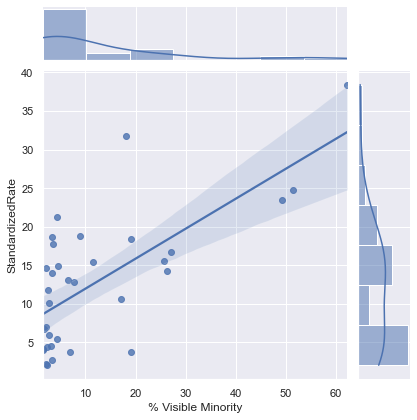

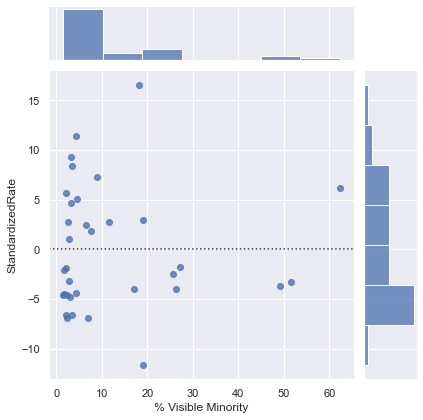

In [22]:
caseRateAndMinority = smf.ols(formula='Age_Adj_Rate ~ PC_Visible_Minority', 
                data=RatesConcatIndicator)
results=caseRateAndMinority.fit()
print(results.summary())
sns.jointplot(data=CovidRatesPHU,x='% Visible Minority',y='StandardizedRate',kind='reg')
plt.show()
sns.jointplot(data=CovidRatesPHU,x='% Visible Minority',y='StandardizedRate',kind='resid')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           Age_Adj_Rate   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     27.28
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.04e-05
Time:                        18:01:42   Log-Likelihood:                -110.65
No. Observations:                  34   AIC:                             225.3
Df Residuals:                      32   BIC:                             228.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.8376      1.457      5.

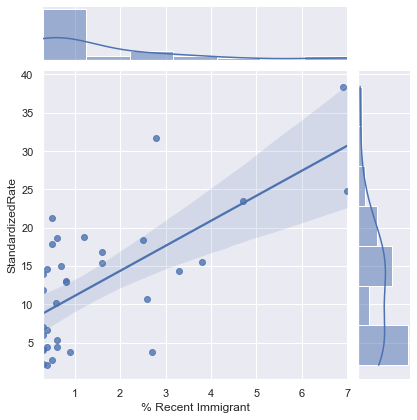

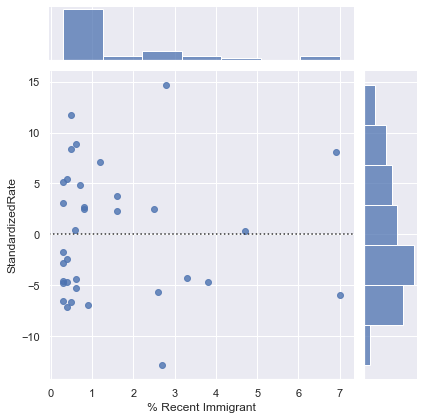

In [23]:
caseRateAndImmigrant = smf.ols(formula='Age_Adj_Rate ~ PC_R_Immigrant', 
                data=RatesConcatIndicator)
results=caseRateAndImmigrant.fit()
print(results.summary())
sns.jointplot(data=CovidRatesPHU,x='% Recent Immigrant',y='StandardizedRate',kind='reg')
plt.show()
sns.jointplot(data=CovidRatesPHU,x='% Recent Immigrant',y='StandardizedRate',kind='resid')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           Age_Adj_Rate   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     6.942
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0129
Time:                        18:01:42   Log-Likelihood:                -117.79
No. Observations:                  34   AIC:                             239.6
Df Residuals:                      32   BIC:                             242.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3596      3.829      0.877      0.3

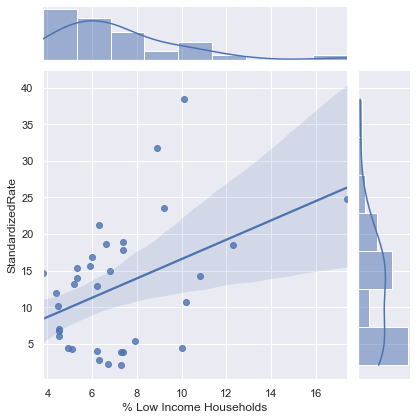

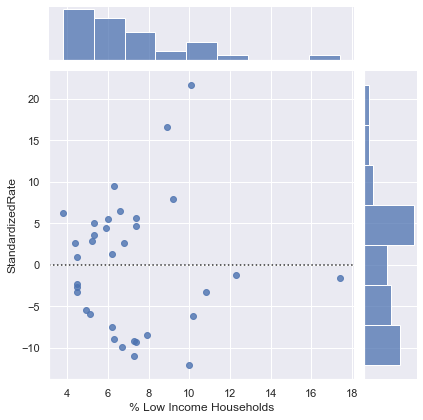

In [24]:
caseRateAndLowInc = smf.ols(formula='Age_Adj_Rate ~ PC_Low_Inc', 
                data=RatesConcatIndicator)
results=caseRateAndLowInc.fit()
print(results.summary())
sns.jointplot(data=CovidRatesPHU,x='% Low Income Households',y='StandardizedRate',kind='reg')
plt.show()
sns.jointplot(data=CovidRatesPHU,x='% Low Income Households',y='StandardizedRate',kind='resid')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           Age_Adj_Rate   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     4.610
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0395
Time:                        18:01:43   Log-Likelihood:                -118.84
No. Observations:                  34   AIC:                             241.7
Df Residuals:                      32   BIC:                             244.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.1539      5.480      4.407      0.0

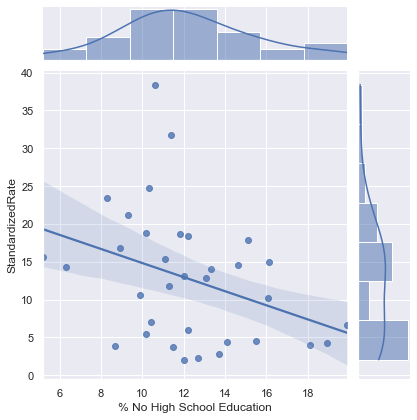

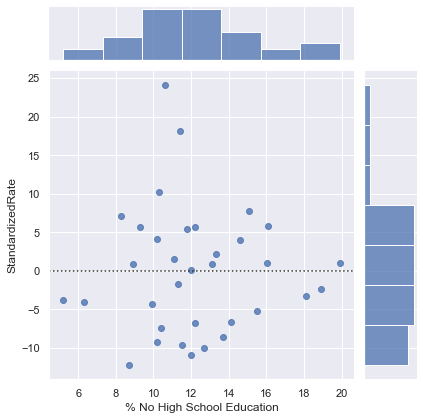

In [25]:
caseRateAndNoHS = smf.ols(formula='Age_Adj_Rate ~ PC_No_HS', 
                data=RatesConcatIndicator)
results=caseRateAndNoHS.fit()
print(results.summary())
sns.jointplot(data=CovidRatesPHU,x='% No High School Education',y='StandardizedRate',kind='reg')
plt.show()
sns.jointplot(data=CovidRatesPHU,x='% No High School Education',y='StandardizedRate',kind='resid')
plt.show()

## something else

In [26]:
CONFIRMED_COVID['Resolved'] = CONFIRMED_COVID.OUTCOME == 'Resolved'
CONFIRMED_COVID['Death'] = CONFIRMED_COVID.OUTCOME == 'Fatal'
CONFIRMED_COVID['Not_Resolved'] = CONFIRMED_COVID.OUTCOME == 'Not_Resolved'
Outcome_Data = CONFIRMED_COVID.sort_values('DATE_REPORTED')

Outcome_Data = Outcome_Data[Outcome_Data.DATE_REPORTED < (Outcome_Data.DATE_REPORTED.iloc[-1]-timedelta(56))]
Outcome_Data

,DATE_REPORTED,AGE_GRP,GENDER,OUTCOME,CODE,PHU,Resolved,Death,Not_Resolved
55772,2020-01-23,50s,FEMALE,Resolved,3895,Toronto Public Health,True,False,False
55773,2020-01-23,50s,MALE,Resolved,3895,Toronto Public Health,True,False,False
33042,2020-01-24,20s,FEMALE,Resolved,2244,Middlesex-London Health Unit,True,False,False
56178,2020-02-21,20s,FEMALE,Resolved,3895,Toronto Public Health,True,False,False
56180,2020-02-25,60s,FEMALE,Resolved,3895,Toronto Public Health,True,False,False
...,...,...,...,...,...,...,...,...,...
408800,2021-04-11,40s,MALE,Resolved,2244,Middlesex-London Health Unit,True,False,False
408905,2021-04-11,30s,MALE,Resolved,2265,"Region of Waterloo, Public Health",True,False,False
408795,2021-04-11,70s,MALE,Resolved,3895,Toronto Public Health,True,False,False
408910,2021-04-11,40s,FEMALE,Resolved,2230,Durham Region Health Department,True,False,False


quickly see Outcomes by Gender

,AGE_GRP2,GENDER,Resolved,Death,Not_Resolved,Total_Cases,Rate per 100,Proportion_of_Cases
0,0-59,FEMALE,155052,153,9,155214,0.521,0.397
1,0-59,MALE,158979,305,4,159288,1.090,0.407
2,60s,FEMALE,16964,268,2,17234,1.555,0.044
3,60s,MALE,18227,510,4,18741,2.721,0.048
4,70s,FEMALE,8774,624,3,9401,6.638,0.024
5,70s,MALE,8371,972,6,9349,10.397,0.024
6,80s,FEMALE,7146,1453,6,8605,16.886,0.022
7,80s,MALE,4180,1407,1,5588,25.179,0.014
8,90+,FEMALE,4244,1530,0,5774,26.498,0.015
9,90+,MALE,1355,786,3,2144,36.660,0.005


<AxesSubplot:xlabel='AGE_GRP2', ylabel='Rate per 100'>

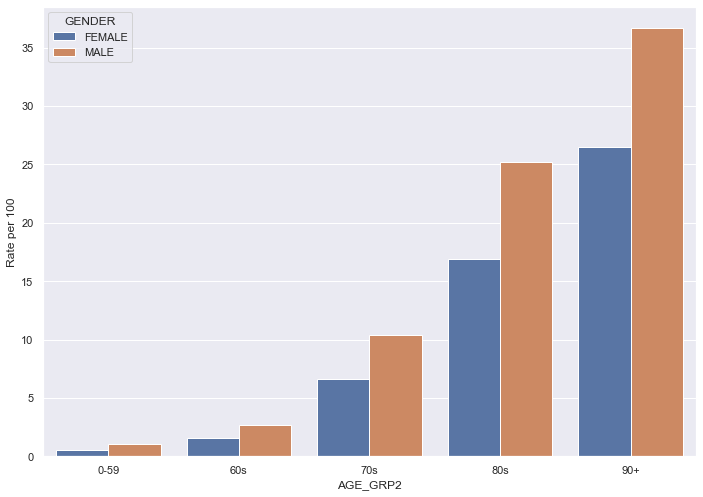

In [27]:
ON_age_sex_mortality = Outcome_Data.groupby(["AGE_GRP", "GENDER"])[["Resolved", "Death", "Not_Resolved"]].agg('sum').reset_index()
ON_age_sex_mortality['Total_Cases']=ON_age_sex_mortality.sum(axis=1)
ON_age_sex_mortality['Rate per 100']=100*ON_age_sex_mortality.Death/ON_age_sex_mortality.Total_Cases
ON_age_sex_mortality

ON_Covid_Cohort = ON_age_sex_mortality
ON_Covid_Cohort['Proportion_of_Cases'] = ON_Covid_Cohort['Total_Cases'] / ON_Covid_Cohort['Total_Cases'].sum()


ON_Covid_Cohort['AGE_GRP2'] = np.where(ON_Covid_Cohort['AGE_GRP']<'60s', '0-59', ON_Covid_Cohort['AGE_GRP'])
ON_Covid_Cohort2 = ON_Covid_Cohort.groupby(['AGE_GRP2', 'GENDER']).sum().reset_index()
display(ON_Covid_Cohort2)
sns.barplot(data=ON_Covid_Cohort2, x='AGE_GRP2', y='Rate per 100', hue='GENDER')

Case Rate seems to have no correlation to gender, however, mortality seems to be strongly linked to gender with males having a consistently higher death rate

In [28]:
Outcome_Data['AGE_GRP2'] = np.where(Outcome_Data['AGE_GRP']<'60s', '0-59', Outcome_Data['AGE_GRP'])
display(Outcome_Data)
PHU_AgeSex_Mortality = Outcome_Data.groupby(['CODE', 'AGE_GRP2', 'GENDER'])[['Resolved', 'Death', 'Not_Resolved']].agg('sum').reset_index()
PHU_AgeSex_Mortality=PHU_AgeSex_Mortality.merge(ON_Covid_Cohort2[['AGE_GRP2','GENDER','Proportion_of_Cases']])

PHU_AgeSex_Mortality['Total_Cases']= (PHU_AgeSex_Mortality.Death+PHU_AgeSex_Mortality.Resolved+PHU_AgeSex_Mortality.Not_Resolved)
PHU_AgeSex_Mortality['Rate_Per_100']=100*PHU_AgeSex_Mortality['Death']/(PHU_AgeSex_Mortality.Total_Cases)
PHU_AgeSex_Mortality['WeightedRate']=PHU_AgeSex_Mortality['Proportion_of_Cases']*PHU_AgeSex_Mortality['Rate_Per_100']
PHU_Mortality = PHU_AgeSex_Mortality.groupby('CODE')[['WeightedRate','Total_Cases','Death']].sum().reset_index()   
PHU_Mortality

,DATE_REPORTED,AGE_GRP,GENDER,OUTCOME,CODE,PHU,Resolved,Death,Not_Resolved,AGE_GRP2
55772,2020-01-23,50s,FEMALE,Resolved,3895,Toronto Public Health,True,False,False,0-59
55773,2020-01-23,50s,MALE,Resolved,3895,Toronto Public Health,True,False,False,0-59
33042,2020-01-24,20s,FEMALE,Resolved,2244,Middlesex-London Health Unit,True,False,False,0-59
56178,2020-02-21,20s,FEMALE,Resolved,3895,Toronto Public Health,True,False,False,0-59
56180,2020-02-25,60s,FEMALE,Resolved,3895,Toronto Public Health,True,False,False,60s
...,...,...,...,...,...,...,...,...,...,...
408800,2021-04-11,40s,MALE,Resolved,2244,Middlesex-London Health Unit,True,False,False,0-59
408905,2021-04-11,30s,MALE,Resolved,2265,"Region of Waterloo, Public Health",True,False,False,0-59
408795,2021-04-11,70s,MALE,Resolved,3895,Toronto Public Health,True,False,False,70s
408910,2021-04-11,40s,FEMALE,Resolved,2230,Durham Region Health Department,True,False,False,0-59


,CODE,WeightedRate,Total_Cases,Death
0,2226,1.240,270,4
1,2227,1.270,2455,17
2,2230,2.189,16544,335
3,2233,0.512,920,4
4,2234,2.428,1792,46
5,2235,2.715,1341,59
6,2236,1.561,11987,210
7,2237,2.030,14286,357
8,2238,1.694,719,7
9,2240,1.475,1686,19


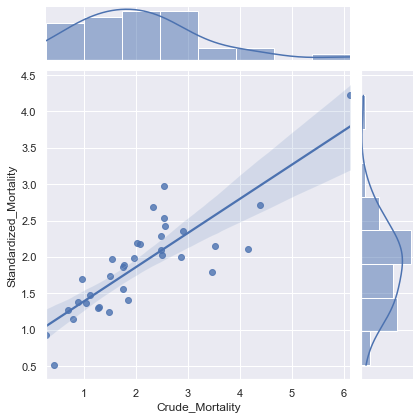

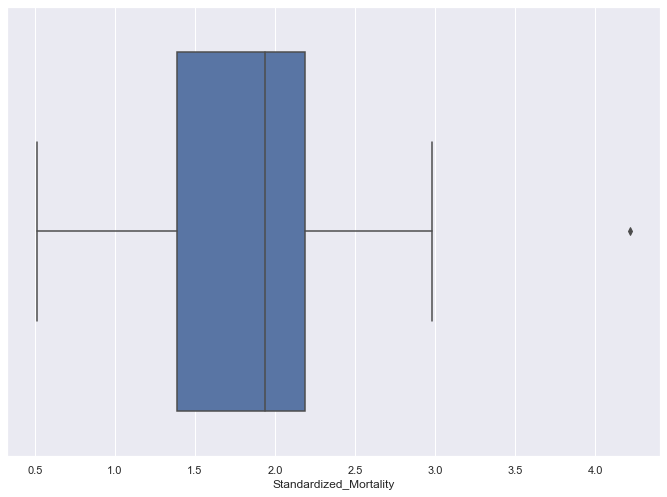

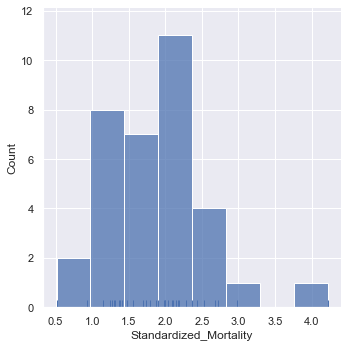

In [29]:
PHU_Mortality['Crude_Mortality'] = 100*PHU_Mortality.Death/PHU_Mortality.Total_Cases
PHU_Mortality.rename(columns={'WeightedRate':'Standardized_Mortality'},inplace=True)
sns.jointplot(data=PHU_Mortality, x='Crude_Mortality',y='Standardized_Mortality', kind='reg')
plt.show()
sns.boxplot(data=PHU_Mortality, x='Standardized_Mortality')
plt.show()
sns.displot(data=PHU_Mortality, x='Standardized_Mortality', rug=True)
plt.show()


In [30]:
PHU_Mortality_Ind = PHU_Mortality.merge(social_subset)
RatesConcatIndicator = PHU_Mortality_Ind.rename(columns = {
                          '% No High School Education': "PC_No_HS",
                           '% Low Income Households': "PC_Low_Inc", 
                           '% Recent Immigrant': "PC_R_Immigrant",
                           '% Visible Minority': "PC_Visible_Minority"})

                              OLS Regression Results                              
Dep. Variable:     Standardized_Mortality   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                 -0.024
Method:                     Least Squares   F-statistic:                    0.2280
Date:                    Fri, 03 Dec 2021   Prob (F-statistic):              0.636
Time:                            18:01:46   Log-Likelihood:                -34.618
No. Observations:                      34   AIC:                             73.24
Df Residuals:                          32   BIC:                             76.29
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

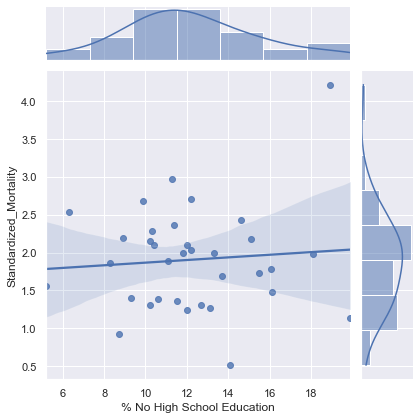

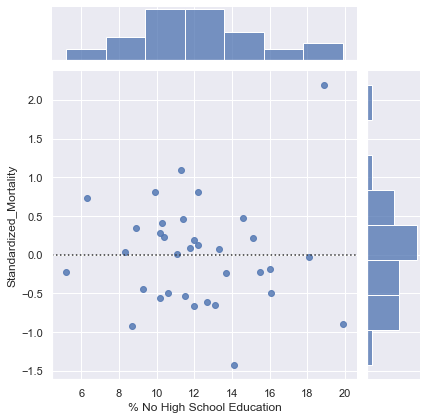

In [31]:
model_No_HS = smf.ols(formula='Standardized_Mortality ~ PC_No_HS', 
                data=RatesConcatIndicator)

results_No_HS = model_No_HS.fit()
print(results_No_HS.summary())

sns.jointplot(data=PHU_Mortality_Ind,x='% No High School Education',y='Standardized_Mortality',kind='reg')
plt.show()
sns.jointplot(data=PHU_Mortality_Ind,x='% No High School Education',y='Standardized_Mortality',kind='resid')
plt.show()


                              OLS Regression Results                              
Dep. Variable:     Standardized_Mortality   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.031
Method:                     Least Squares   F-statistic:                  0.001160
Date:                    Fri, 03 Dec 2021   Prob (F-statistic):              0.973
Time:                            18:01:46   Log-Likelihood:                -34.738
No. Observations:                      34   AIC:                             73.48
Df Residuals:                          32   BIC:                             76.53
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

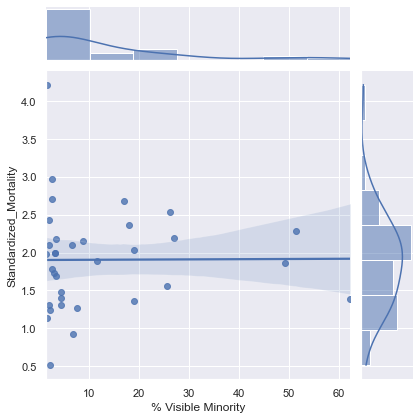

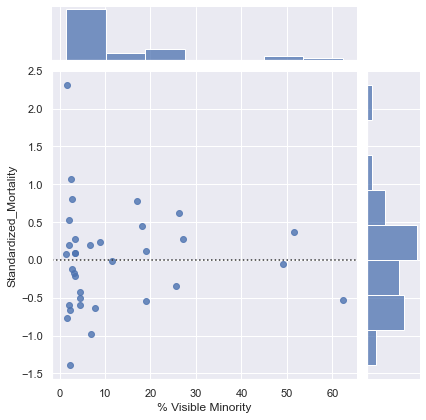

In [32]:
model_Vis_Min = smf.ols(formula='Standardized_Mortality ~ PC_Visible_Minority', 
                data=RatesConcatIndicator)

results_Vis_Min = model_Vis_Min.fit()
print(results_Vis_Min.summary())

sns.jointplot(data=PHU_Mortality_Ind,x='% Visible Minority',y='Standardized_Mortality',kind='reg')
plt.show()
sns.jointplot(data=PHU_Mortality_Ind,x='% Visible Minority',y='Standardized_Mortality',kind='resid')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     Standardized_Mortality   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.031
Method:                     Least Squares   F-statistic:                   0.02211
Date:                    Fri, 03 Dec 2021   Prob (F-statistic):              0.883
Time:                            18:01:47   Log-Likelihood:                -34.727
No. Observations:                      34   AIC:                             73.45
Df Residuals:                          32   BIC:                             76.51
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

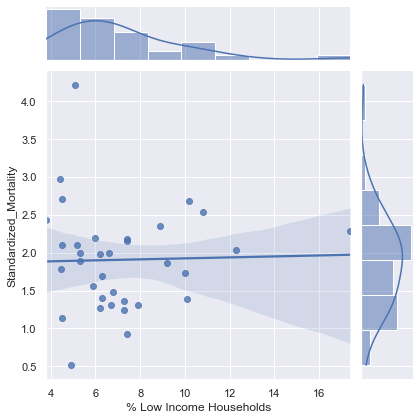

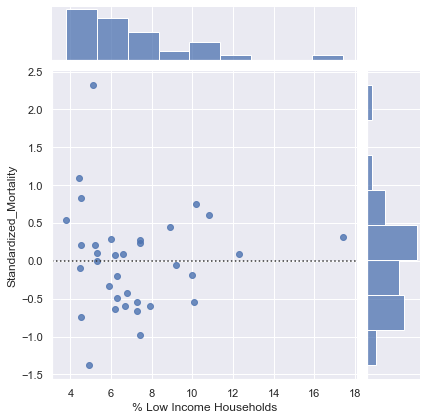

In [33]:
model_Low_Inc = smf.ols(formula='Standardized_Mortality ~ PC_Low_Inc', 
                data=RatesConcatIndicator)

results_Low_Inc = model_Low_Inc.fit()
print(results_Low_Inc.summary())

sns.jointplot(data=PHU_Mortality_Ind,x='% Low Income Households',y='Standardized_Mortality',kind='reg')
plt.show()
sns.jointplot(data=PHU_Mortality_Ind,x='% Low Income Households',y='Standardized_Mortality',kind='resid')
plt.show()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Standardized_Mortality   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.031
Method:                     Least Squares   F-statistic:                  0.006273
Date:                    Fri, 03 Dec 2021   Prob (F-statistic):              0.937
Time:                            18:01:47   Log-Likelihood:                -34.735
No. Observations:                      34   AIC:                             73.47
Df Residuals:                          32   BIC:                             76.52
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8980      0.156     12.143      0.000       1.580       2.216
PC_R_Immigrant     0.0053      0.067      0.079      0.937      -0.131       0.142
==============================================================================
Omnibus:                       11.558   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.062
Skew:                           0.946   Prob(JB):                      0.00146
Kurtosis:                       5.375   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

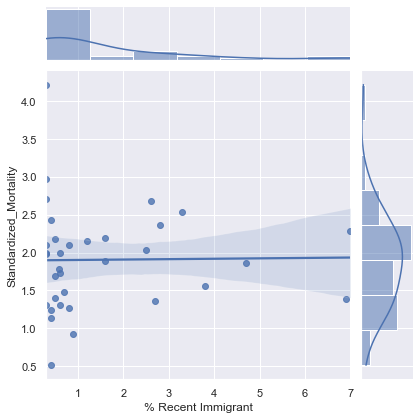

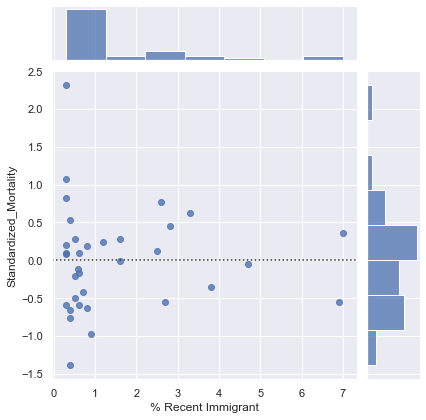

In [34]:
model_R_Immigrant = smf.ols(formula='Standardized_Mortality ~ PC_R_Immigrant', 
                data=RatesConcatIndicator)

results_R_Immigrant = model_R_Immigrant.fit()
display(results_R_Immigrant.summary())

sns.jointplot(data=PHU_Mortality_Ind,x='% Recent Immigrant',y='Standardized_Mortality',kind='reg')
plt.show()
sns.jointplot(data=PHU_Mortality_Ind,x='% Recent Immigrant',y='Standardized_Mortality',kind='resid')
plt.show()
